# Pymaceuticals Inc.
---

### Analysis
- Over the course of 45 days, Capomulin drug regimen appears to have the most affect in reducing tumor volume, but after a closer look at our line chart. It would appear the tumor volume would begin to increase towards the end of the trial. 


- There shows to be a strong positive correlation between the weight and average tumor volume for the capomulin drug regimen.


- There shows to be a higher amount of mice that were treated with both Capomulin and Ramicane which shows us more of these drug affects on a larger group compared to the other drug regimens. A key insight with this information is noting that there are no outliers for either drug. 


- Some limitations that would also be helpful is knowing the potency of each drugs that were given to mouse and if that had a direct correlation with reducing tumor volume.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_completedata = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_completedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = mouse_study_completedata['Mouse ID'].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID_data = mouse_study_completedata.loc[mouse_study_completedata.duplicated(['Mouse ID', 'Timepoint'])]
ID_duplicate_mice = duplicate_miceID_data['Mouse ID'].unique()
ID_duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = mouse_study_completedata[mouse_study_completedata.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_study_completedata.loc[mouse_study_completedata['Mouse ID'] != 'g989']
clean_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_CD = clean_data['Mouse ID'].nunique()
num_mice_CD

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
clean_data_table = clean_data.groupby("Drug Regimen")

sample = clean_data.sample()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_Tumorv = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
med_Tumorv = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_Tumorv = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_Tumorv = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_Tumorv = clean_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


# Assemble the resulting series into a single summary DataFrame.
summary_statDICT = {
        "Mean Total Volume": mean_Tumorv,
        "Median Total Volume": med_Tumorv,
        "Tumor Volume Variance": var_Tumorv,
        "Tumor Volume Std. Dev": std_Tumorv,
        "Tumor Volume Std. Err": sem_Tumorv,
}


summary_statDF = pd.DataFrame(summary_statDICT)

summary_statDF


,Mean Total Volume,Median Total Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_method = clean_data.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)': [ 'mean', 'median', 'var', 'std', 'sem']})
summary_agg_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

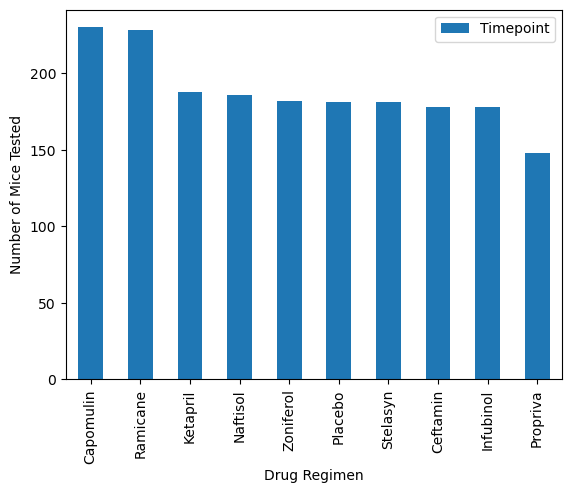

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimenDF = clean_data.groupby(['Drug Regimen']).count()[['Timepoint']].sort_values(['Timepoint'], ascending=False)
drug_regimenDF.plot.bar(ylabel='Number of Mice Tested')


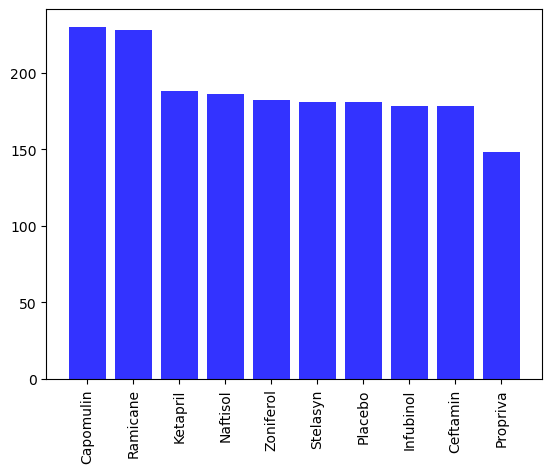

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
micetotalcount = clean_data["Drug Regimen"].value_counts()

x_Axis = micetotalcount.index.values
y_Axis = micetotalcount.values


plt.bar(x_Axis, y_Axis, color="blue", alpha=0.8, align='center')
plt.xticks(rotation='vertical')
plt.show()


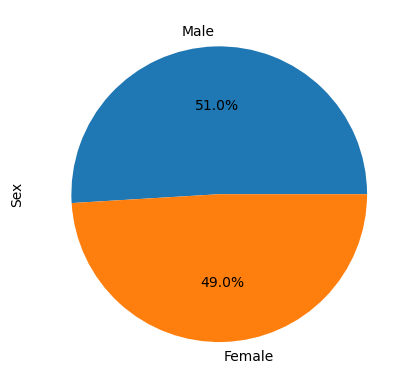

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pieplotdf = clean_data["Sex"].value_counts()

micecountpie = pieplotdf.plot(kind="pie", y='Sex', autopct='%1.1f%%')

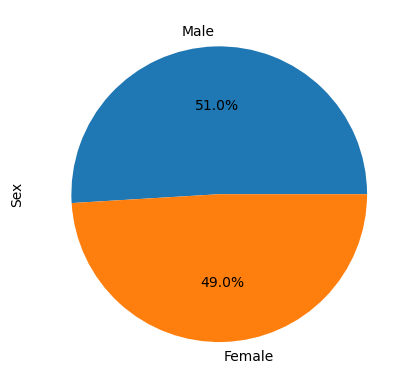

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_data = clean_data['Sex'].value_counts()
pie_labels = pie_data.index.values
pie_values = pie_data.values
plt.pie(pie_values, autopct="%1.1f%%", labels=pie_labels)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_times = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
max_times = max_times.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timesDF = pd.merge(max_times, clean_data, how='left', on= ['Mouse ID', 'Timepoint'])
max_timesDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []


for t in range(len(treatments)):
    tumor_vol.append(max_timesDF.loc[max_timesDF['Drug Regimen'] == treatments[t],:]['Tumor Volume (mm3)'])
            

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin = max_timesDF.loc[max_timesDF['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
Ramicane = max_timesDF.loc[max_timesDF['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
Infubinol = max_timesDF.loc[max_timesDF['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
Ceftamin = max_timesDF.loc[max_timesDF['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']

    # add subset 
Ceftamin_Q3 = Ceftamin.quantile(.75)
Ceftamin_Q1 = Ceftamin.quantile(.25)
Ceftamin_IQR = Ceftamin_Q3 - Ceftamin_Q1

Ramicane_Q3 = Ramicane.quantile(.75)
Ramicane_Q1 = Ramicane.quantile(.25)
Ramicane_IQR = Ramicane_Q3 - Ramicane_Q1

Infubinol_Q3 = Infubinol.quantile(.75)
Infubinol_Q1 = Infubinol.quantile(.25)
Infubinol_IQR = Infubinol_Q3 - Infubinol_Q1

Capomulin_Q3 = Capomulin.quantile(.75)
Capomulin_Q1 = Capomulin.quantile(.25)
Capomulin_IQR = Capomulin_Q3 - Capomulin_Q1

    # Determine outliers using upper and lower bounds
    
Capomulin_upperb = Capomulin_Q3 + (1.5 * Capomulin_IQR)
Capomulin_lowerb = Capomulin_Q1 - (1.5 * Capomulin_IQR)

Ramicane_upperb = Ramicane_Q3 + (1.5 * Ramicane_IQR)
Ramicane_lowerb = Ramicane_Q1 - (1.5 * Ramicane_IQR)

Infubinol_upperb = Infubinol_Q3 + (1.5 * Infubinol_IQR)
Infubinol_lowerb = Infubinol_Q1 - (1.5 * Infubinol_IQR)

Ceftamin_upperb = Ceftamin_Q3 + (1.5 * Ceftamin_IQR)
Ceftamin_lowerb = Ceftamin_Q1 - (1.5 * Ceftamin_IQR)

Capomulin_outliers = [vol for vol in Capomulin if (Capomulin_lowerb > vol or vol > Capomulin_upperb)]
Ramicane_outliers = [vol for vol in Ramicane if (Ramicane_lowerb > vol or vol > Ramicane_upperb)]
Infubinol_outliers = [vol for vol in Infubinol if (Infubinol_lowerb > vol or vol > Infubinol_upperb)]
Ceftamin_outliers = [vol for vol in Ceftamin if (Ceftamin_lowerb > vol or vol > Ceftamin_upperb)]

print(f"Capomulin's potential outliers: {Capomulin_outliers}")
print(f"Ramicane's potential outliers: {Ramicane_outliers}")
print(f"Infubinol's potential outliers: {Infubinol_outliers}")
print(f"Ceftamin's potential outliers: {Ceftamin_outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


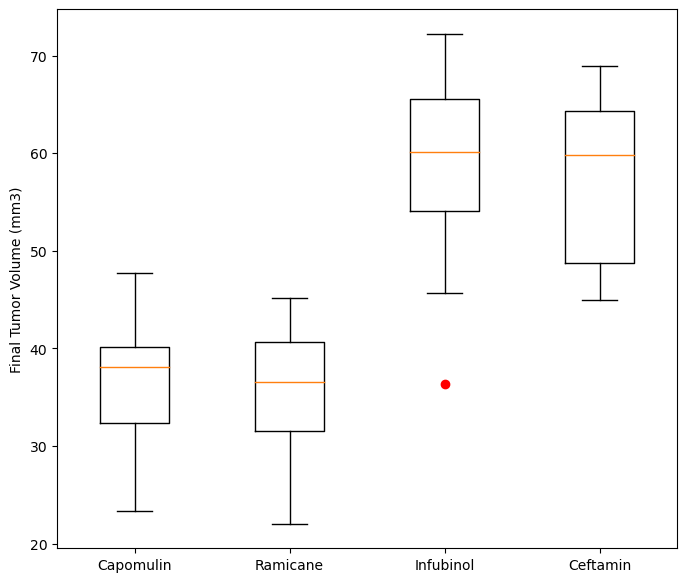

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8,7))
plt.boxplot(tumor_vol, 0, "ro")
plt.xticks(range(1,5), treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

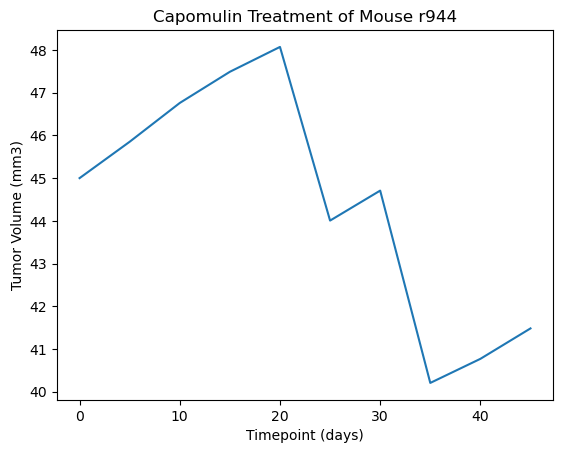

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

micesc = clean_data.loc[clean_data['Mouse ID'] == 'l509']

xTime = micesc['Timepoint']
yTumor = micesc['Tumor Volume (mm3)']

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Capomulin Treatment of Mouse r944")

plt.plot(xTime, yTumor)
plt.show()


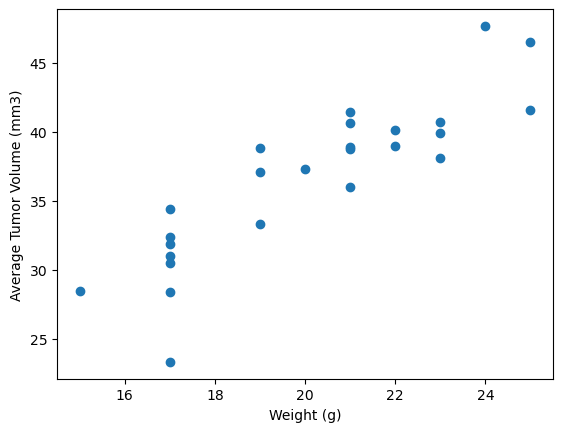

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_regimen = max_timesDF.loc[max_timesDF['Drug Regimen'] == 'Capomulin']

weight = cap_regimen['Weight (g)']
tumor_volume = cap_regimen['Tumor Volume (mm3)']

plt.scatter(weight, tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient is 0.88


Text(0, 0.5, 'Average Tumor Volume (mm3)')

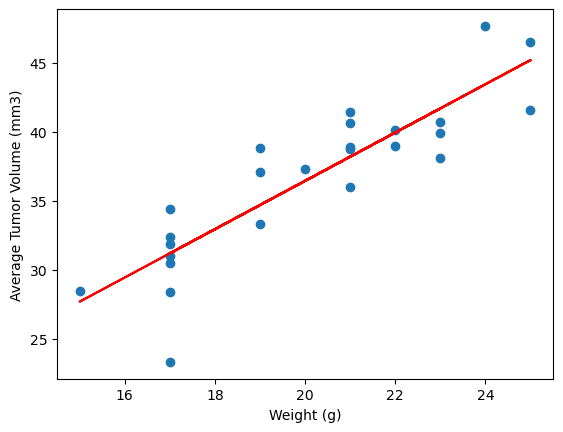

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = st.pearsonr(weight, tumor_volume)

print(f'The correlation coefficient is {round(corr[0], 2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_volume)

#variable for line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight, tumor_volume)
plt.plot(weight, weight * slope + intercept, color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
